In [1]:
import tensorflow as tf

###  自动求导

In [4]:
print(tf.__version__)
print(tf.test.is_gpu_available())

2.0.0-beta0
False


In [5]:
a=tf.constant(1.)
b=tf.constant(2.)
print(a+b)

tf.Tensor(3.0, shape=(), dtype=float32)


In [6]:
x=tf.constant(1.)
a=tf.constant(2.)
b=tf.constant(3.)
c=tf.constant(4.)

with tf.GradientTape() as tape:
    tape.watch([a,b,c])
    y=a**2*x+b*x+c
    
[dy_da,dy_db,dy_dc]=tape.gradient(y,[a,b,c])
print(dy_da,dy_db,dy_dc)

W0802 19:32:22.542203 139840374912768 deprecation.py:323] From /home/gengdd/anaconda3/lib/python3.7/site-packages/tensorflow/python/ops/math_grad.py:1205: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


tf.Tensor(4.0, shape=(), dtype=float32) tf.Tensor(1.0, shape=(), dtype=float32) tf.Tensor(1.0, shape=(), dtype=float32)


### 数据类型

In [22]:
tf.constant(1)

<tf.Tensor: id=94722, shape=(), dtype=int32, numpy=1>

In [23]:
tf.constant(1.)

<tf.Tensor: id=94724, shape=(), dtype=float32, numpy=1.0>

In [24]:
tf.constant(1,dtype=tf.double)

<tf.Tensor: id=94726, shape=(), dtype=float64, numpy=1.0>

In [25]:
tf.constant('hello world')

<tf.Tensor: id=94728, shape=(), dtype=string, numpy=b'hello world'>

In [43]:
with tf.device('cpu'):
    a=tf.range(4)
    
print(a.device)
print(a)
print(a.numpy())

/job:localhost/replica:0/task:0/device:CPU:0
tf.Tensor([0 1 2 3], shape=(4,), dtype=int32)
[0 1 2 3]


In [34]:
a.ndim

1

In [35]:
tf.rank(a)

<tf.Tensor: id=94750, shape=(), dtype=int32, numpy=1>

In [36]:
tf.rank(tf.ones([3,4,2]))

<tf.Tensor: id=94755, shape=(), dtype=int32, numpy=3>

In [41]:
tf.ones([3,4,2]).numpy()

array([[[1., 1.],
        [1., 1.],
        [1., 1.],
        [1., 1.]],

       [[1., 1.],
        [1., 1.],
        [1., 1.],
        [1., 1.]],

       [[1., 1.],
        [1., 1.],
        [1., 1.],
        [1., 1.]]], dtype=float32)

In [42]:
import numpy as np

a=np.arange(5)
print(a)
aa=tf.convert_to_tensor(a)
print(aa)

[0 1 2 3 4]
tf.Tensor([0 1 2 3 4], shape=(5,), dtype=int64)


In [45]:
aaa=tf.cast(aa,dtype=tf.float32)
print(aaa)

tf.Tensor([0. 1. 2. 3. 4.], shape=(5,), dtype=float32)


In [46]:
b=tf.constant([0,1])
print(tf.cast(b,dtype=tf.bool))

tf.Tensor([False  True], shape=(2,), dtype=bool)


In [47]:
a=tf.range(5)
b=tf.Variable(a)
print(b.dtype)
print(b.name)

<dtype: 'int32'>
Variable:0


In [48]:
b=tf.Variable(a,name='input_data')
print(b.name)
print(b.trainable)

input_data:0
True


### 创建Tensor

In [51]:
tf.convert_to_tensor(np.ones([2,3]))

<tf.Tensor: id=94805, shape=(2, 3), dtype=float64, numpy=
array([[1., 1., 1.],
       [1., 1., 1.]])>

In [53]:
print(tf.convert_to_tensor([1,2]))
print(tf.convert_to_tensor([1,2.]))
print(tf.convert_to_tensor([[1],[2]]))

tf.Tensor([1 2], shape=(2,), dtype=int32)
tf.Tensor([1. 2.], shape=(2,), dtype=float32)
tf.Tensor(
[[1]
 [2]], shape=(2, 1), dtype=int32)


In [56]:
tf.zeros([1])

<tf.Tensor: id=94827, shape=(1,), dtype=float32, numpy=array([0.], dtype=float32)>

In [57]:
tf.zeros([2,2])

<tf.Tensor: id=94831, shape=(2, 2), dtype=float32, numpy=
array([[0., 0.],
       [0., 0.]], dtype=float32)>

In [59]:
tf.zeros([2,3,3])

<tf.Tensor: id=94839, shape=(2, 3, 3), dtype=float32, numpy=
array([[[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]]], dtype=float32)>

In [60]:
a=tf.zeros([2,3,3])
tf.zeros_like(a)

<tf.Tensor: id=94844, shape=(2, 3, 3), dtype=float32, numpy=
array([[[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]]], dtype=float32)>

In [61]:
tf.ones([2,3])

<tf.Tensor: id=94848, shape=(2, 3), dtype=float32, numpy=
array([[1., 1., 1.],
       [1., 1., 1.]], dtype=float32)>

In [64]:
tf.fill([2,3],1.)

<tf.Tensor: id=94856, shape=(2, 3), dtype=float32, numpy=
array([[1., 1., 1.],
       [1., 1., 1.]], dtype=float32)>

In [65]:
tf.fill([2,3],9)

<tf.Tensor: id=94860, shape=(2, 3), dtype=int32, numpy=
array([[9, 9, 9],
       [9, 9, 9]], dtype=int32)>

In [66]:
tf.random.normal([2,2])

<tf.Tensor: id=94867, shape=(2, 2), dtype=float32, numpy=
array([[-1.0641457 , -0.5535518 ],
       [-0.8210061 , -0.72732884]], dtype=float32)>

In [67]:
tf.random.normal([2,2],mean=1,stddev=1)

<tf.Tensor: id=94874, shape=(2, 2), dtype=float32, numpy=
array([[0.72426045, 2.4615374 ],
       [2.5403519 , 0.17680568]], dtype=float32)>

In [68]:
tf.random.truncated_normal([2,2],mean=0,stddev=1)

<tf.Tensor: id=94881, shape=(2, 2), dtype=float32, numpy=
array([[ 1.3481885 , -0.44612297],
       [ 0.5362661 ,  1.0703357 ]], dtype=float32)>

In [69]:
tf.random.uniform([2,2],minval=0,maxval=1)

<tf.Tensor: id=94889, shape=(2, 2), dtype=float32, numpy=
array([[0.55060744, 0.9095324 ],
       [0.24752343, 0.66867256]], dtype=float32)>

In [71]:
idx=tf.range(10)
idx=tf.random.shuffle(idx)
idx

<tf.Tensor: id=94900, shape=(10,), dtype=int32, numpy=array([1, 6, 9, 7, 5, 4, 3, 2, 8, 0], dtype=int32)>

In [75]:
a=tf.random.normal([10,784])
b=tf.random.uniform([10],maxval=10,dtype=tf.int32)
print(a)
print(b)

tf.Tensor(
[[ 1.0152639  -2.260799    0.52656907 ... -0.8163732  -0.81900936
   0.11866292]
 [-0.3901685  -0.6993162   1.5206238  ...  1.4228816   0.35651082
   0.6910408 ]
 [ 0.27518043  2.4305701   1.027862   ... -1.2805071  -2.4497166
   0.7667424 ]
 ...
 [ 0.2846264  -1.1687261   0.08107454 ... -0.09495079 -1.023807
  -0.09348065]
 [-2.4458618   0.1447182   1.3588252  ... -1.0025566  -0.533949
   0.38310874]
 [-0.32595125 -1.7671152  -0.64729685 ... -1.2961153  -0.7744424
   0.75361866]], shape=(10, 784), dtype=float32)
tf.Tensor([0 0 0 2 4 6 0 9 4 7], shape=(10,), dtype=int32)


In [76]:
a=tf.gather(a,idx)
b=tf.gather(b,idx)
print(b)

tf.Tensor([0 0 7 9 6 4 2 0 4 0], shape=(10,), dtype=int32)


In [78]:
out=tf.random.uniform([4,10])
out

<tf.Tensor: id=94958, shape=(4, 10), dtype=float32, numpy=
array([[4.0469575e-01, 9.2921770e-01, 4.1759014e-04, 3.2329094e-01,
        5.4404545e-01, 2.7431214e-01, 1.7958105e-01, 2.7135420e-01,
        1.3883722e-01, 6.2074101e-01],
       [1.5753698e-01, 6.6221392e-01, 9.3854547e-01, 5.2017927e-02,
        3.5655856e-01, 5.8797967e-01, 6.1648059e-01, 3.0059445e-01,
        4.9997139e-01, 1.9407868e-01],
       [7.8890395e-01, 6.3019967e-01, 1.9117987e-01, 4.4864571e-01,
        4.5918643e-01, 5.4137683e-01, 8.9670312e-01, 8.3162677e-01,
        5.1220119e-01, 5.0796390e-02],
       [6.6180015e-01, 8.3417606e-01, 6.2290764e-01, 3.7976789e-01,
        1.8034613e-01, 4.0719628e-02, 7.9171169e-01, 4.2064381e-01,
        1.9878030e-02, 5.5677438e-01]], dtype=float32)>

In [79]:
y=tf.range(4)
y=tf.one_hot(y,depth=10)
y

<tf.Tensor: id=94967, shape=(4, 10), dtype=float32, numpy=
array([[1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.]], dtype=float32)>

In [84]:
loss=tf.keras.losses.mse(y,out)
print(loss)
loss=tf.reduce_mean(loss)
print(loss)

tf.Tensor([0.22040601 0.22533882 0.4139545  0.30548555], shape=(4,), dtype=float32)
tf.Tensor(0.2912962, shape=(), dtype=float32)


In [87]:
net=layers.Dense(10)
net.build((4,8))
net.kernel

<tf.Variable 'kernel:0' shape=(8, 10) dtype=float32, numpy=
array([[ 0.5719726 ,  0.24599779,  0.29336727, -0.02593428, -0.18497282,
         0.05996782,  0.5436239 ,  0.13891923, -0.03889108,  0.332743  ],
       [-0.49222988, -0.33220947, -0.29562375,  0.48547125, -0.4692032 ,
        -0.13565427,  0.14520681,  0.23270029, -0.2604374 ,  0.18330687],
       [-0.06283289,  0.17672765, -0.26519254,  0.37222314,  0.00633842,
         0.57690024, -0.5432485 , -0.5134624 ,  0.3354388 ,  0.07562935],
       [-0.533784  ,  0.03903037, -0.48408   ,  0.5746106 ,  0.3225286 ,
         0.472517  , -0.04908842,  0.13172776, -0.30608276,  0.20166826],
       [-0.5620696 ,  0.48569536, -0.45736384,  0.2630489 ,  0.11902297,
        -0.00460702, -0.2907103 , -0.04419589, -0.25074828, -0.4149307 ],
       [ 0.37649167, -0.12120545, -0.21953744, -0.30252847, -0.4108992 ,
         0.0932619 ,  0.05316275, -0.4583672 , -0.44644207,  0.03186482],
       [-0.0961436 ,  0.27769953,  0.3262192 ,  0.23609489

In [88]:
net.bias

<tf.Variable 'bias:0' shape=(10,) dtype=float32, numpy=array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)>

In [90]:
x=tf.random.normal((4,32,32,3))
net=layers.Conv2D(16,kernel_size=3,)
net(x).shape

TensorShape([4, 30, 30, 16])

### 索引与切片

In [94]:
a=tf.ones((1,5,5,3))
a[0][0]

<tf.Tensor: id=95140, shape=(5, 3), dtype=float32, numpy=
array([[1., 1., 1.],
       [1., 1., 1.],
       [1., 1., 1.],
       [1., 1., 1.],
       [1., 1., 1.]], dtype=float32)>

In [95]:
a[0][0][0]

<tf.Tensor: id=95153, shape=(3,), dtype=float32, numpy=array([1., 1., 1.], dtype=float32)>

In [96]:
a[0][0][0][1]

<tf.Tensor: id=95170, shape=(), dtype=float32, numpy=1.0>

In [104]:
a=tf.random.normal([4,28,28,3])
print(a[1].shape)
print(a[1,2].shape)
print(a[1][2].shape)
print(a[1,2,3].shape)
print(a[1,2,3,2].shape)

print(a[0,:,:,:].shape)
print(a[0,1,:,:].shape)
print(a[:,:,:,0].shape)
print(a[:,0,:,:].shape)

print(a[0:2,:,:,:].shape)
print(a[:,0:28:2,0:28:2,:].shape)
print(a[:,:14,14:,:].shape)

(28, 28, 3)
(28, 3)
(28, 3)
(3,)
()
(28, 28, 3)
(28, 3)
(4, 28, 28)
(4, 28, 3)
(2, 28, 28, 3)
(4, 14, 14, 3)
(4, 14, 14, 3)


In [98]:
a=tf.range(10)
print(a[-1:])
print(a[-2:])
print(a[:2])
print(a[:-1])

tf.Tensor([9], shape=(1,), dtype=int32)
tf.Tensor([8 9], shape=(2,), dtype=int32)
tf.Tensor([0 1], shape=(2,), dtype=int32)
tf.Tensor([0 1 2 3 4 5 6 7 8], shape=(9,), dtype=int32)


In [106]:
a=tf.random.normal([4,35,8])
tf.gather(a,axis=0,indices=[2,3]).shape

TensorShape([2, 35, 8])

In [108]:
tf.gather(a,axis=0,indices=[2,1,3,0]).shape

TensorShape([4, 35, 8])

In [109]:
tf.gather(a,axis=1,indices=[2,3,7,9,16]).shape

TensorShape([4, 5, 8])

In [110]:
tf.gather_nd(a,[0]).shape

TensorShape([35, 8])

In [111]:
tf.gather_nd(a,[0,1]).shape

TensorShape([8])

In [112]:
tf.gather_nd(a,[0,1,2]).shape

TensorShape([])

In [115]:
tf.gather_nd(a,[[0,1,2]]).shape

TensorShape([1])

In [116]:
print(tf.gather_nd(a,[[0,0],[1,1]]).shape)
print(tf.gather_nd(a,[[0,0],[1,1],[2,2]]).shape)
print(tf.gather_nd(a,[[0,0,0],[1,1,1],[2,2,2]]).shape)
print(tf.gather_nd(a,[[[0,0,0],[1,1,1],[2,2,2]]]).shape)

(2, 8)
(3, 8)
(3,)
(1, 3)


In [121]:
a=tf.random.normal([4,28,28,3])
tf.boolean_mask(a,mask=[True,True,False,False]).shape

TensorShape([2, 28, 28, 3])

In [122]:
tf.boolean_mask(a,mask=[True,True,False],axis=3).shape

TensorShape([4, 28, 28, 2])

In [123]:
a=tf.ones([2,3,4])
tf.boolean_mask(a,mask=[[True,False,False],[False,True,True]])

<tf.Tensor: id=95665, shape=(3, 4), dtype=float32, numpy=
array([[1., 1., 1., 1.],
       [1., 1., 1., 1.],
       [1., 1., 1., 1.]], dtype=float32)>

### 维度变换

In [124]:
a=tf.random.normal([4,28,28,3])
print(a.shape)
print(a.ndim)

(4, 28, 28, 3)
4


In [125]:
tf.reshape(a,[4,784,3]).shape

TensorShape([4, 784, 3])

In [126]:
tf.reshape(a,[4,-1,3]).shape

TensorShape([4, 784, 3])

In [127]:
tf.reshape(a,[4,784*3]).shape

TensorShape([4, 2352])

In [128]:
tf.reshape(a,[4,-1]).shape

TensorShape([4, 2352])

In [130]:
a=tf.random.normal((4,3,2,1))

print(a.shape)
print(tf.transpose(a).shape)
print(tf.transpose(a,perm=[0,1,3,2]).shape)

(4, 3, 2, 1)
(1, 2, 3, 4)
(4, 3, 1, 2)


In [131]:
a=tf.random.normal([4,35,8])
tf.expand_dims(a,axis=0).shape

TensorShape([1, 4, 35, 8])

In [132]:
tf.expand_dims(a,axis=3).shape

TensorShape([4, 35, 8, 1])

In [133]:
tf.expand_dims(a,axis=2).shape

TensorShape([4, 35, 1, 8])

In [135]:
a=tf.zeros([1,2,1,3])
print(tf.squeeze(a,axis=0).shape)
print(tf.squeeze(a,axis=2).shape)
print(tf.squeeze(a).shape)

(2, 1, 3)
(1, 2, 3)
(2, 3)


### Broadcasting

In [143]:
x=tf.random.normal([4,32,32,3])

print((x+tf.random.normal([3])).shape)
print((x+tf.random.normal([32,32,1])).shape)
print((x+tf.random.normal([32,1])).shape)
print((x+tf.random.normal([4,1,1,1])).shape)
print((x+tf.random.normal([32,1,1])).shape)

(4, 32, 32, 3)
(4, 32, 32, 3)
(4, 32, 32, 3)
(4, 32, 32, 3)
(4, 32, 32, 3)


In [145]:
a=tf.ones([3,4])

a1=tf.broadcast_to(a,[2,3,4])
a1

<tf.Tensor: id=95945, shape=(2, 3, 4), dtype=float32, numpy=
array([[[1., 1., 1., 1.],
        [1., 1., 1., 1.],
        [1., 1., 1., 1.]],

       [[1., 1., 1., 1.],
        [1., 1., 1., 1.],
        [1., 1., 1., 1.]]], dtype=float32)>

In [147]:
a2=tf.expand_dims(a,axis=0)
print(a2.shape)
a2=tf.tile(a2,[2,1,1])
a2

(1, 3, 4)


<tf.Tensor: id=95952, shape=(2, 3, 4), dtype=float32, numpy=
array([[[1., 1., 1., 1.],
        [1., 1., 1., 1.],
        [1., 1., 1., 1.]],

       [[1., 1., 1., 1.],
        [1., 1., 1., 1.],
        [1., 1., 1., 1.]]], dtype=float32)>

In [148]:
a=tf.random.normal([2,3])
b=tf.broadcast_to(a,[2,2,3])
print(a)
print(b)

tf.Tensor(
[[ 0.15966819 -0.54989266 -0.61711645]
 [ 1.0568006   0.4434742  -0.5989949 ]], shape=(2, 3), dtype=float32)
tf.Tensor(
[[[ 0.15966819 -0.54989266 -0.61711645]
  [ 1.0568006   0.4434742  -0.5989949 ]]

 [[ 0.15966819 -0.54989266 -0.61711645]
  [ 1.0568006   0.4434742  -0.5989949 ]]], shape=(2, 2, 3), dtype=float32)


### 数学运算

In [151]:
b=tf.fill([2,2],2.)
a=tf.ones([2,2])

print(a+b)
print(a-b)
print(a*b)
print(a/b)
print(a//b)
print(a%b)

tf.Tensor(
[[3. 3.]
 [3. 3.]], shape=(2, 2), dtype=float32)
tf.Tensor(
[[-1. -1.]
 [-1. -1.]], shape=(2, 2), dtype=float32)
tf.Tensor(
[[2. 2.]
 [2. 2.]], shape=(2, 2), dtype=float32)
tf.Tensor(
[[0.5 0.5]
 [0.5 0.5]], shape=(2, 2), dtype=float32)
tf.Tensor(
[[0. 0.]
 [0. 0.]], shape=(2, 2), dtype=float32)
tf.Tensor(
[[1. 1.]
 [1. 1.]], shape=(2, 2), dtype=float32)


In [152]:
tf.math.log(a)

<tf.Tensor: id=96008, shape=(2, 2), dtype=float32, numpy=
array([[0., 0.],
       [0., 0.]], dtype=float32)>

In [154]:
print(tf.math.exp(a))
print(tf.exp(a))

tf.Tensor(
[[2.7182817 2.7182817]
 [2.7182817 2.7182817]], shape=(2, 2), dtype=float32)
tf.Tensor(
[[2.7182817 2.7182817]
 [2.7182817 2.7182817]], shape=(2, 2), dtype=float32)


In [155]:
tf.math.log(8.)/tf.math.log(2.)

<tf.Tensor: id=96020, shape=(), dtype=float32, numpy=3.0>

In [156]:
print(tf.pow(b,3))
print(b**3)

print(tf.sqrt(b))

tf.Tensor(
[[8. 8.]
 [8. 8.]], shape=(2, 2), dtype=float32)
tf.Tensor(
[[8. 8.]
 [8. 8.]], shape=(2, 2), dtype=float32)
tf.Tensor(
[[1.4142135 1.4142135]
 [1.4142135 1.4142135]], shape=(2, 2), dtype=float32)


In [160]:
print(a@b)
print(tf.matmul(a,b))
print(a*b)
print(tf.multiply(a,b))

tf.Tensor(
[[4. 4.]
 [4. 4.]], shape=(2, 2), dtype=float32)
tf.Tensor(
[[4. 4.]
 [4. 4.]], shape=(2, 2), dtype=float32)
tf.Tensor(
[[2. 2.]
 [2. 2.]], shape=(2, 2), dtype=float32)
tf.Tensor(
[[2. 2.]
 [2. 2.]], shape=(2, 2), dtype=float32)


In [161]:
a=tf.ones([4,2,3])
b=tf.fill([4,3,5],2.)
print(a@b)

tf.Tensor(
[[[6. 6. 6. 6. 6.]
  [6. 6. 6. 6. 6.]]

 [[6. 6. 6. 6. 6.]
  [6. 6. 6. 6. 6.]]

 [[6. 6. 6. 6. 6.]
  [6. 6. 6. 6. 6.]]

 [[6. 6. 6. 6. 6.]
  [6. 6. 6. 6. 6.]]], shape=(4, 2, 5), dtype=float32)


In [162]:
a=tf.ones([4,2,3])
b=tf.ones([3,5])
bb=tf.broadcast_to(b,[4,3,5])
print(a@bb)

tf.Tensor(
[[[3. 3. 3. 3. 3.]
  [3. 3. 3. 3. 3.]]

 [[3. 3. 3. 3. 3.]
  [3. 3. 3. 3. 3.]]

 [[3. 3. 3. 3. 3.]
  [3. 3. 3. 3. 3.]]

 [[3. 3. 3. 3. 3.]
  [3. 3. 3. 3. 3.]]], shape=(4, 2, 5), dtype=float32)


In [163]:
x=tf.ones([4,2])
W=tf.ones([2,1])
b=tf.constant(0.1)

out=x@W+b
print(out)

out=tf.nn.relu(out)
print(out)

tf.Tensor(
[[2.1]
 [2.1]
 [2.1]
 [2.1]], shape=(4, 1), dtype=float32)
tf.Tensor(
[[2.1]
 [2.1]
 [2.1]
 [2.1]], shape=(4, 1), dtype=float32)


### 合并与分割

In [179]:
a=tf.ones([4,35,8])
b=tf.ones([2,35,8])

c=tf.concat([a,b],axis=0)
print(c.shape)

a=tf.ones([4,35,8])
b=tf.ones([4,3,8])

c=tf.concat([a,b],axis=1)
print(c.shape)

(6, 35, 8)
(4, 38, 8)


In [42]:
a=tf.random.normal([4,35,8])
b=tf.random.normal([4,35,8])

print(tf.stack([a,b],axis=0).shape)
print(tf.stack([a,b],axis=3).shape)
print(tf.stack([a,b],axis=1).shape)

(2, 4, 35, 8)
(4, 35, 8, 2)
(4, 2, 35, 8)


In [187]:
c=tf.random.normal([2,4,35,8])
aa,bb=tf.stack(c,axis=0)
print(aa.shape)
res=tf.unstack(c,axis=3)
print(len(res))
print(res[0].shape)

(4, 35, 8)
8
(2, 4, 35)


In [188]:
res=tf.split(c,axis=3,num_or_size_splits=2)
len(res)

2

In [189]:
res[0].shape

TensorShape([2, 4, 35, 4])

In [191]:
res=tf.split(c,axis=3,num_or_size_splits=[2,2,4])
print(len(res))
print(res[2].shape)

3
(2, 4, 35, 4)


### 数据统计

In [193]:
a=tf.ones([2,2])
print(tf.norm(a))
print(tf.sqrt(tf.reduce_sum(tf.square(a))))

a=tf.ones([4,28,28,3])
print(tf.norm(a))
print(tf.sqrt(tf.reduce_sum(tf.square(a))))

tf.Tensor(2.0, shape=(), dtype=float32)
tf.Tensor(2.0, shape=(), dtype=float32)
tf.Tensor(96.99484, shape=(), dtype=float32)
tf.Tensor(96.99484, shape=(), dtype=float32)


In [194]:
b=tf.ones([2,2])
tf.norm(b)

<tf.Tensor: id=678476, shape=(), dtype=float32, numpy=2.0>

In [195]:
tf.norm(b,ord=2,axis=1)

<tf.Tensor: id=678482, shape=(2,), dtype=float32, numpy=array([1.4142135, 1.4142135], dtype=float32)>

In [196]:
tf.norm(b,ord=1)

<tf.Tensor: id=678487, shape=(), dtype=float32, numpy=4.0>

In [197]:
tf.norm(b,ord=1,axis=0)

<tf.Tensor: id=678492, shape=(2,), dtype=float32, numpy=array([2., 2.], dtype=float32)>

In [200]:
a=tf.random.normal([4,10])

# print(a)

print(tf.reduce_min(a))
print(tf.reduce_max(a))
print(tf.reduce_mean(a))

print(tf.reduce_min(a,axis=1))
print(tf.reduce_max(a,axis=1))
print(tf.reduce_mean(a,axis=1))

tf.Tensor(-2.6057558, shape=(), dtype=float32)
tf.Tensor(1.6370752, shape=(), dtype=float32)
tf.Tensor(0.0987134, shape=(), dtype=float32)
tf.Tensor([-1.2044216 -2.6057558 -1.8708804 -1.1437688], shape=(4,), dtype=float32)
tf.Tensor([1.4591022 1.1102319 1.4955748 1.6370752], shape=(4,), dtype=float32)
tf.Tensor([ 0.04620284 -0.02091467  0.09594734  0.27361807], shape=(4,), dtype=float32)


In [201]:
tf.argmax(a).shape

TensorShape([10])

In [203]:
tf.argmax(a,axis=1)

<tf.Tensor: id=678564, shape=(4,), dtype=int64, numpy=array([7, 7, 1, 5])>

In [204]:
tf.argmax(a,axis=0)

<tf.Tensor: id=678567, shape=(10,), dtype=int64, numpy=array([3, 2, 2, 1, 1, 3, 0, 0, 2, 3])>

In [206]:
a=tf.constant([0,1,1,2,4])
b=tf.range(5)

res=tf.equal(a,b)
tf.reduce_sum(tf.cast(res,dtype=tf.int32))

<tf.Tensor: id=678584, shape=(), dtype=int32, numpy=3>

In [207]:
a=tf.range(5)
tf.unique(a)

Unique(y=<tf.Tensor: id=678590, shape=(5,), dtype=int32, numpy=array([0, 1, 2, 3, 4], dtype=int32)>, idx=<tf.Tensor: id=678591, shape=(5,), dtype=int32, numpy=array([0, 1, 2, 3, 4], dtype=int32)>)

In [208]:
a=tf.constant([4,2,2,4,3])
tf.unique(a)

Unique(y=<tf.Tensor: id=678595, shape=(3,), dtype=int32, numpy=array([4, 2, 3], dtype=int32)>, idx=<tf.Tensor: id=678596, shape=(5,), dtype=int32, numpy=array([0, 1, 1, 0, 2], dtype=int32)>)

### 张量排序

In [1]:
import tensorflow as tf

In [2]:
a=tf.random.shuffle(tf.range(5))
print(a)

tf.Tensor([2 1 4 0 3], shape=(5,), dtype=int32)


In [4]:
tf.sort(a,direction='DESCENDING')

<tf.Tensor: id=14, shape=(5,), dtype=int32, numpy=array([4, 3, 2, 1, 0], dtype=int32)>

In [5]:
tf.argsort(a,direction='DESCENDING')

<tf.Tensor: id=26, shape=(5,), dtype=int32, numpy=array([2, 4, 0, 1, 3], dtype=int32)>

In [6]:
idx=tf.argsort(a,direction='DESCENDING')
tf.gather(a,idx)

<tf.Tensor: id=39, shape=(5,), dtype=int32, numpy=array([4, 3, 2, 1, 0], dtype=int32)>

In [7]:
a=tf.random.uniform([3,3],maxval=10,dtype=tf.int32)
a

<tf.Tensor: id=44, shape=(3, 3), dtype=int32, numpy=
array([[8, 3, 8],
       [4, 5, 2],
       [9, 7, 5]], dtype=int32)>

In [8]:
tf.sort(a)

<tf.Tensor: id=57, shape=(3, 3), dtype=int32, numpy=
array([[3, 8, 8],
       [2, 4, 5],
       [5, 7, 9]], dtype=int32)>

In [9]:
tf.sort(a,direction='DESCENDING')

<tf.Tensor: id=67, shape=(3, 3), dtype=int32, numpy=
array([[8, 8, 3],
       [5, 4, 2],
       [9, 7, 5]], dtype=int32)>

In [12]:
tf.sort(a,axis=0)

<tf.Tensor: id=113, shape=(3, 3), dtype=int32, numpy=
array([[4, 3, 2],
       [8, 5, 5],
       [9, 7, 8]], dtype=int32)>

In [15]:
a=tf.random.uniform([3,3],maxval=10,dtype=tf.int32)
print(a)
res=tf.math.top_k(a,2)
print(res.values)
print(res.indices)

tf.Tensor(
[[1 0 4]
 [1 0 0]
 [8 6 0]], shape=(3, 3), dtype=int32)
tf.Tensor(
[[4 1]
 [1 0]
 [8 6]], shape=(3, 2), dtype=int32)
tf.Tensor(
[[2 0]
 [0 1]
 [0 1]], shape=(3, 2), dtype=int32)


In [16]:
prob=tf.constant([[0.1,0.2,0.7],[0.2,0.7,0.1]])
target=tf.constant([2,0])

k_b=tf.math.top_k(prob,3).indices

k_b=tf.transpose(k_b,[1,0])
print(k_b)

tf.Tensor(
[[2 1]
 [1 0]
 [0 2]], shape=(3, 2), dtype=int32)


In [17]:
target=tf.broadcast_to(target,[3,2])
print(target)

tf.Tensor(
[[2 0]
 [2 0]
 [2 0]], shape=(3, 2), dtype=int32)


### 填充与复制

In [19]:
a=tf.reshape(tf.range(9),[3,3])
print(a)

tf.Tensor(
[[0 1 2]
 [3 4 5]
 [6 7 8]], shape=(3, 3), dtype=int32)


In [20]:
tf.pad(a,[[1,0],[0,0]])

<tf.Tensor: id=165, shape=(4, 3), dtype=int32, numpy=
array([[0, 0, 0],
       [0, 1, 2],
       [3, 4, 5],
       [6, 7, 8]], dtype=int32)>

In [21]:
tf.pad(a,[[1,1],[0,0]])

<tf.Tensor: id=168, shape=(5, 3), dtype=int32, numpy=
array([[0, 0, 0],
       [0, 1, 2],
       [3, 4, 5],
       [6, 7, 8],
       [0, 0, 0]], dtype=int32)>

In [22]:
tf.pad(a,[[1,1],[1,1]])

<tf.Tensor: id=171, shape=(5, 5), dtype=int32, numpy=
array([[0, 0, 0, 0, 0],
       [0, 0, 1, 2, 0],
       [0, 3, 4, 5, 0],
       [0, 6, 7, 8, 0],
       [0, 0, 0, 0, 0]], dtype=int32)>

In [23]:
a=tf.random.normal([4,28,28,3])
b=tf.pad(a,[[0,0],[2,2],[2,2],[0,0]])
print(b.shape)

(4, 32, 32, 3)


In [25]:
a=tf.reshape(tf.range(9),[3,3])

tf.tile(a,[1,2])

<tf.Tensor: id=189, shape=(3, 6), dtype=int32, numpy=
array([[0, 1, 2, 0, 1, 2],
       [3, 4, 5, 3, 4, 5],
       [6, 7, 8, 6, 7, 8]], dtype=int32)>

In [26]:
tf.tile(a,[2,1])

<tf.Tensor: id=192, shape=(6, 3), dtype=int32, numpy=
array([[0, 1, 2],
       [3, 4, 5],
       [6, 7, 8],
       [0, 1, 2],
       [3, 4, 5],
       [6, 7, 8]], dtype=int32)>

In [27]:
tf.tile(a,[2,2])

<tf.Tensor: id=195, shape=(6, 6), dtype=int32, numpy=
array([[0, 1, 2, 0, 1, 2],
       [3, 4, 5, 3, 4, 5],
       [6, 7, 8, 6, 7, 8],
       [0, 1, 2, 0, 1, 2],
       [3, 4, 5, 3, 4, 5],
       [6, 7, 8, 6, 7, 8]], dtype=int32)>

In [28]:
aa=tf.expand_dims(a,axis=0)

tf.tile(aa,[2,1,1])

<tf.Tensor: id=200, shape=(2, 3, 3), dtype=int32, numpy=
array([[[0, 1, 2],
        [3, 4, 5],
        [6, 7, 8]],

       [[0, 1, 2],
        [3, 4, 5],
        [6, 7, 8]]], dtype=int32)>

In [29]:
tf.broadcast_to(aa,[2,3,3])

<tf.Tensor: id=203, shape=(2, 3, 3), dtype=int32, numpy=
array([[[0, 1, 2],
        [3, 4, 5],
        [6, 7, 8]],

       [[0, 1, 2],
        [3, 4, 5],
        [6, 7, 8]]], dtype=int32)>

### 张量限幅

In [31]:
a=tf.range(10)
a

<tf.Tensor: id=208, shape=(10,), dtype=int32, numpy=array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=int32)>

In [32]:
tf.maximum(a,2)

<tf.Tensor: id=211, shape=(10,), dtype=int32, numpy=array([2, 2, 2, 3, 4, 5, 6, 7, 8, 9], dtype=int32)>

In [33]:
tf.minimum(a,8)

<tf.Tensor: id=214, shape=(10,), dtype=int32, numpy=array([0, 1, 2, 3, 4, 5, 6, 7, 8, 8], dtype=int32)>

In [34]:
tf.clip_by_value(a,2,8)

<tf.Tensor: id=219, shape=(10,), dtype=int32, numpy=array([2, 2, 2, 3, 4, 5, 6, 7, 8, 8], dtype=int32)>

In [35]:
a=a-5

tf.nn.relu(a)

<tf.Tensor: id=223, shape=(10,), dtype=int32, numpy=array([0, 0, 0, 0, 0, 0, 1, 2, 3, 4], dtype=int32)>

In [36]:
a=tf.random.normal([2,2],mean=10)
a

<tf.Tensor: id=230, shape=(2, 2), dtype=float32, numpy=
array([[ 9.606168,  9.979214],
       [10.899365,  8.760098]], dtype=float32)>

In [37]:
tf.norm(a)

<tf.Tensor: id=236, shape=(), dtype=float32, numpy=19.682446>

In [40]:
aa=tf.clip_by_norm(a,15)
aa

<tf.Tensor: id=286, shape=(2, 2), dtype=float32, numpy=
array([[7.320864 , 7.6051626],
       [8.306411 , 6.6760745]], dtype=float32)>

In [41]:
tf.norm(aa)

<tf.Tensor: id=292, shape=(), dtype=float32, numpy=14.999999>

### 高阶OP

In [42]:
a=tf.random.normal([3,3])
a

<tf.Tensor: id=299, shape=(3, 3), dtype=float32, numpy=
array([[-0.38726708,  0.2066715 ,  1.1470621 ],
       [-0.28038445,  0.25295958, -0.16618201],
       [ 0.49355465,  0.12864359, -0.18534598]], dtype=float32)>

In [43]:
mask=a>0
mask

<tf.Tensor: id=302, shape=(3, 3), dtype=bool, numpy=
array([[False,  True,  True],
       [False,  True, False],
       [ True,  True, False]])>

In [44]:
tf.boolean_mask(a,mask)

<tf.Tensor: id=330, shape=(5,), dtype=float32, numpy=
array([0.2066715 , 1.1470621 , 0.25295958, 0.49355465, 0.12864359],
      dtype=float32)>

In [46]:
indices=tf.where(mask)
indices

<tf.Tensor: id=333, shape=(5, 2), dtype=int64, numpy=
array([[0, 1],
       [0, 2],
       [1, 1],
       [2, 0],
       [2, 1]])>

In [47]:
tf.gather_nd(a,indices)

<tf.Tensor: id=335, shape=(5,), dtype=float32, numpy=
array([0.2066715 , 1.1470621 , 0.25295958, 0.49355465, 0.12864359],
      dtype=float32)>

In [48]:
mask

<tf.Tensor: id=302, shape=(3, 3), dtype=bool, numpy=
array([[False,  True,  True],
       [False,  True, False],
       [ True,  True, False]])>

In [49]:
A=tf.ones([3,3])
B=tf.zeros([3,3])

tf.where(mask,A,B)

<tf.Tensor: id=344, shape=(3, 3), dtype=float32, numpy=
array([[0., 1., 1.],
       [0., 1., 0.],
       [1., 1., 0.]], dtype=float32)>

In [50]:
indices=tf.constant([[4],[3],[1],[7]])
updates=tf.constant([9,10,11,12])
shape=tf.constant([8])
tf.scatter_nd(indices,updates,shape)

<tf.Tensor: id=349, shape=(8,), dtype=int32, numpy=array([ 0, 11,  0, 10,  9,  0,  0, 12], dtype=int32)>

In [51]:
y=tf.linspace(-2.,2,5)
x=tf.linspace(-2.,2,5)

points_x,points_y=tf.meshgrid(x,y)
points_x.shape

TensorShape([5, 5])

In [52]:
points_x

<tf.Tensor: id=377, shape=(5, 5), dtype=float32, numpy=
array([[-2., -1.,  0.,  1.,  2.],
       [-2., -1.,  0.,  1.,  2.],
       [-2., -1.,  0.,  1.,  2.],
       [-2., -1.,  0.,  1.,  2.],
       [-2., -1.,  0.,  1.,  2.]], dtype=float32)>

In [54]:
poins=tf.stack([points_x,points_y],axis=2)
poins

<tf.Tensor: id=381, shape=(5, 5, 2), dtype=float32, numpy=
array([[[-2., -2.],
        [-1., -2.],
        [ 0., -2.],
        [ 1., -2.],
        [ 2., -2.]],

       [[-2., -1.],
        [-1., -1.],
        [ 0., -1.],
        [ 1., -1.],
        [ 2., -1.]],

       [[-2.,  0.],
        [-1.,  0.],
        [ 0.,  0.],
        [ 1.,  0.],
        [ 2.,  0.]],

       [[-2.,  1.],
        [-1.,  1.],
        [ 0.,  1.],
        [ 1.,  1.],
        [ 2.,  1.]],

       [[-2.,  2.],
        [-1.,  2.],
        [ 0.,  2.],
        [ 1.,  2.],
        [ 2.,  2.]]], dtype=float32)>

points: (500, 500, 2)
z: (500, 500)


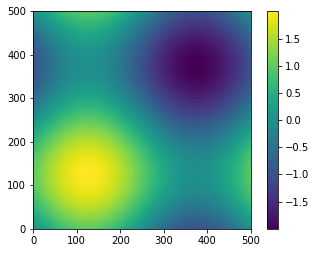

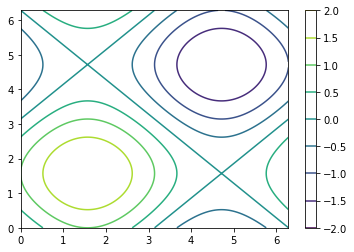

In [56]:
import matplotlib.pyplot as plt

def func(x):
    z=tf.math.sin(x[...,0])+tf.math.sin(x[...,1])
    return z

x=tf.linspace(0.,2*3.14,500)
y=tf.linspace(0.,2*3.14,500)

points_x,points_y=tf.meshgrid(x,y)
poins=tf.stack([points_x,points_y],axis=2)
print('points:',poins.shape)
z=func(poins)
print('z:',z.shape)

plt.figure('plot 2d func value')
plt.imshow(z,origin='lower',interpolation='none')
plt.colorbar()

plt.figure('plot 2d func contour')
plt.contour(points_x,points_y,z)
plt.colorbar()
plt.show()

x,y range: (120,) (120,)
X,Y maps: (120, 120) (120, 120)


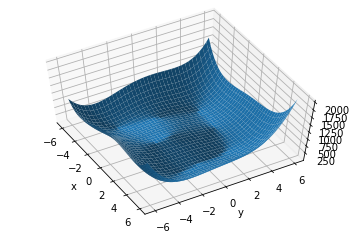

step 0: x = [ 3.26       -0.09999999], f(x) = 34.0
step 20: x = [ 3.54679   -1.4388103], f(x) = 2.747403860092163
step 40: x = [ 3.5843565 -1.8473401], f(x) = 1.7569735064171255e-05
step 60: x = [ 3.5844283 -1.8481257], f(x) = 2.3646862246096134e-11
step 80: x = [ 3.5844283 -1.8481264], f(x) = 2.2737367544323206e-13
step 100: x = [ 3.5844283 -1.8481264], f(x) = 2.2737367544323206e-13
step 120: x = [ 3.5844283 -1.8481264], f(x) = 2.2737367544323206e-13
step 140: x = [ 3.5844283 -1.8481264], f(x) = 2.2737367544323206e-13
step 160: x = [ 3.5844283 -1.8481264], f(x) = 2.2737367544323206e-13
step 180: x = [ 3.5844283 -1.8481264], f(x) = 2.2737367544323206e-13


In [60]:
import  numpy as np
from    mpl_toolkits.mplot3d import Axes3D
from    matplotlib import pyplot as plt
import  tensorflow as tf



def himmelblau(x):
    return (x[0] ** 2 + x[1] - 11) ** 2 + (x[0] + x[1] ** 2 - 7) ** 2


x = np.arange(-6, 6, 0.1)
y = np.arange(-6, 6, 0.1)
print('x,y range:', x.shape, y.shape)
X, Y = np.meshgrid(x, y)
print('X,Y maps:', X.shape, Y.shape)
Z = himmelblau([X, Y])

fig = plt.figure('himmelblau')
ax = fig.gca(projection='3d')
ax.plot_surface(X, Y, Z)
ax.view_init(60, -30)
ax.set_xlabel('x')
ax.set_ylabel('y')
plt.show()


# [1., 0.], [-4, 0.], [4, 0.]
x = tf.constant([4., 0.])

for step in range(200):

    with tf.GradientTape() as tape:
        tape.watch([x])
        y = himmelblau(x)

    grads = tape.gradient(y, [x])[0] 
    x -= 0.01*grads

    

    if step % 20 == 0:
        print ('step {}: x = {}, f(x) = {}'
               .format(step, x.numpy(), y.numpy()))

### 前向传播

In [164]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import datasets
import os

In [166]:
(x,y),_=datasets.mnist.load_data()

x=tf.convert_to_tensor(x,dtype=tf.float32)/255
y=tf.convert_to_tensor(y,dtype=tf.int32)

print(x.shape,y.shape)
print(tf.reduce_min(x),tf.reduce_max(x))
print(tf.reduce_min(y),tf.reduce_max(y))

(60000, 28, 28) (60000,)
tf.Tensor(0.0, shape=(), dtype=float32) tf.Tensor(1.0, shape=(), dtype=float32)
tf.Tensor(0, shape=(), dtype=int32) tf.Tensor(9, shape=(), dtype=int32)


In [167]:
train_db=tf.data.Dataset.from_tensor_slices((x,y)).batch(128)
train_iter=iter(train_db)
sample=next(train_iter)

print('batch:',sample[0].shape,sample[1].shape)

batch: (128, 28, 28) (128,)


In [169]:
w1=tf.Variable(tf.random.truncated_normal([784,256],stddev=0.1))
b1=tf.Variable(tf.zeros([256]))
w2=tf.Variable(tf.random.truncated_normal([256,128],stddev=0.1))
b2=tf.Variable(tf.zeros([128]))
w3=tf.Variable(tf.random.truncated_normal([128,10],stddev=0.1))
b3=tf.Variable(tf.zeros([10]))

lr=1e-3

In [177]:
optimizer=optimizers.SGD(learning_rate=lr)

for epoch in range(5):
    for step,(x,y) in enumerate(train_db):
        x=tf.reshape(x,[-1,28*28])
        
        with tf.GradientTape() as tape:
            h1=x@w1+tf.broadcast_to(b1,[x.shape[0],256])
            h1=tf.nn.relu(h1)
            h2 = h1@w2 + b2
            h2 = tf.nn.relu(h2)
            out = h2@w3 + b3
            
            y_onehot=tf.one_hot(y,depth=10)
            
            loss=tf.square(y_onehot-out)
            loss=tf.reduce_mean(loss)
        
        grads=tape.gradient(loss,[w1,b1,w2,b2,w3,b3])
        
#         w1.assign_sub(lr * grads[0])
#         b1.assign_sub(lr * grads[1])
#         w2.assign_sub(lr * grads[2])
#         b2.assign_sub(lr * grads[3])
#         w3.assign_sub(lr * grads[4])
#         b3.assign_sub(lr * grads[5])
        optimizer.apply_gradients(zip(grads,[w1,b1,w2,b2,w3,b3]))
        if step%100==0:
            print(epoch,step,'loss:',float(loss))

0 0 loss: 0.07825803011655807
0 100 loss: 0.08172547072172165
0 200 loss: 0.08062225580215454
0 300 loss: 0.07686122506856918
0 400 loss: 0.0822737067937851
1 0 loss: 0.0760853961110115
1 100 loss: 0.07965002954006195
1 200 loss: 0.07838620245456696
1 300 loss: 0.07490221410989761
1 400 loss: 0.08025802671909332
2 0 loss: 0.07410559803247452
2 100 loss: 0.07776626199483871
2 200 loss: 0.07638567686080933
2 300 loss: 0.0731327086687088
2 400 loss: 0.07842270284891129
3 0 loss: 0.07229354977607727
3 100 loss: 0.076051265001297
3 200 loss: 0.07457579672336578
3 300 loss: 0.07153337448835373
3 400 loss: 0.0767492726445198
4 0 loss: 0.07063685357570648
4 100 loss: 0.07448240369558334
4 200 loss: 0.0729379802942276
4 300 loss: 0.07008672505617142
4 400 loss: 0.07521213591098785


### MNIST

In [7]:
import os 
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers,optimizers,datasets

In [19]:
(x,y),(x_val,y_val)=datasets.mnist.load_data()
x=tf.convert_to_tensor(x,dtype=tf.float32)/255
y=tf.convert_to_tensor(y,dtype=tf.int32)
y=tf.one_hot(y,depth=10)
print(x.shape,y.shape)

train_data=tf.data.Dataset.from_tensor_slices((x,y))
train_data=train_data.batch(200)
print(train_data)

(60000, 28, 28) (60000, 10)
<BatchDataset shapes: ((None, 28, 28), (None, 10)), types: (tf.float32, tf.float32)>


In [20]:
model=keras.Sequential([
    layers.Dense(512,activation='relu'),
    layers.Dense(256,activation='relu'),
    layers.Dense(10)
])

optimizer=optimizers.SGD(learning_rate=0.001)

In [21]:
def train_epoch(epoch):
    for step,(x,y) in enumerate(train_data):
        with tf.GradientTape() as tape:
            x=tf.reshape(x,(-1,28*28))
            out=model(x)
            loss=tf.reduce_sum(tf.square(out-y))/x.shape[0]
            
        grads=tape.gradient(loss,model.trainable_variables)
        
        optimizer.apply_gradients(zip(grads,model.trainable_variables))
        
        if (step%100==0):
            print(epoch,step,'loss:',loss.numpy())
            
def train():
    for epoch in range(5):
        train_epoch(epoch)
        
if __name__=='__main__':
    train()

0 0 loss: 1.9859205
0 100 loss: 0.9467012
0 200 loss: 0.75306135
1 0 loss: 0.70348406
1 100 loss: 0.68450755
1 200 loss: 0.58047044
2 0 loss: 0.56902695
2 100 loss: 0.59083444
2 200 loss: 0.50836205
3 0 loss: 0.503386
3 100 loss: 0.538123
3 200 loss: 0.46511155
4 0 loss: 0.4621201
4 100 loss: 0.5029466
4 200 loss: 0.43468314


### MLP

In [59]:
from tensorflow import keras

x=tf.random.normal([2,3])

model=keras.Sequential([
    keras.layers.Dense(2,activation='relu'),
    keras.layers.Dense(2,activation='relu'),
    keras.layers.Dense(2)
])

model.build(input_shape=[None,3])
model.summary()

for p in model.trainable_variables:
    print(p.name,p.shape)

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              multiple                  8         
_________________________________________________________________
dense_4 (Dense)              multiple                  6         
_________________________________________________________________
dense_5 (Dense)              multiple                  6         
Total params: 20
Trainable params: 20
Non-trainable params: 0
_________________________________________________________________
dense_3/kernel:0 (3, 2)
dense_3/bias:0 (2,)
dense_4/kernel:0 (2, 2)
dense_4/bias:0 (2,)
dense_5/kernel:0 (2, 2)
dense_5/bias:0 (2,)


### fashionmnist

In [61]:
import tensorflow as tf
from    tensorflow import keras
from    tensorflow.keras import datasets, layers, optimizers, Sequential, metrics

In [63]:
def preprocess(x,y):
    x=tf.cast(x,dtype=tf.float32)/255
    y=tf.cast(y,dtype=tf.int32)
    return x,y

(x,y),(x_test,y_test)=datasets.fashion_mnist.load_data()
print(x.shape,y.shape)

(60000, 28, 28) (60000,)


In [68]:
batchsz=128

db=tf.data.Dataset.from_tensor_slices((x,y))
db=db.map(preprocess).batch(batchsz)

db_test = tf.data.Dataset.from_tensor_slices((x_test,y_test))
db_test = db_test.map(preprocess).batch(batchsz)

db_iter=iter(db)
sample=next(db_iter)
print('batch:',sample[0].shape,sample[1].shape)

batch: (128, 28, 28) (128,)


In [69]:
model=Sequential([
    layers.Dense(256,activation=tf.nn.relu),
    layers.Dense(128,activation=tf.nn.relu),
    layers.Dense(64,activation=tf.nn.relu),
    layers.Dense(32,activation=tf.nn.relu),
    layers.Dense(10,activation=tf.nn.relu)
])

model.build(input_shape=[None,28*28])
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              multiple                  200960    
_________________________________________________________________
dense_7 (Dense)              multiple                  32896     
_________________________________________________________________
dense_8 (Dense)              multiple                  8256      
_________________________________________________________________
dense_9 (Dense)              multiple                  2080      
_________________________________________________________________
dense_10 (Dense)             multiple                  330       
Total params: 244,522
Trainable params: 244,522
Non-trainable params: 0
_________________________________________________________________


In [79]:
optimizer=optimizers.Adam(learning_rate=1e-3)

def main():
    for epoch in range(10):
        for step,(x,y) in enumerate(db):
            x=tf.reshape(x,[-1,28*28])
            with tf.GradientTape() as tape:
                logits=model(x)
                y_onehot=tf.one_hot(y,depth=10)
                
                loss_mse=tf.reduce_mean(tf.losses.MSE(y_onehot,logits))
                lose_ce=tf.losses.categorical_crossentropy(y_onehot,logits,from_logits=True)
                loss_ce=tf.reduce_mean(lose_ce)
                
            grads=tape.gradient(lose_ce,model.trainable_variables)
            optimizer.apply_gradients(zip(grads,model.trainable_variables))
            
            if (step%100==0):
                print(epoch, step, 'loss:', float(loss_ce), float(loss_mse))
        
        total_correct=0
        total_num=0
        for x,y in db_test:
            x = tf.reshape(x, [-1, 28*28])
            logits = model(x)
            prob=tf.nn.softmax(logits,axis=1)
            
            pred=tf.argmax(prob,axis=1)
            pred=tf.cast(pred,dtype=tf.int32)
            
            correct=tf.equal(pred,y)
            correct=tf.reduce_sum(tf.cast(correct,dtype=tf.int32))
            
            total_correct+=int(correct)
            total_num+=x.shape[0]
            
        acc=total_correct/total_num
        print(epoch,'test acc:',acc)
        
if __name__=='__main__':
    main()

0 0 loss: 2.1704764366149902 0.08208804577589035
0 100 loss: 0.7136040329933167 7.0123162269592285
0 200 loss: 0.707526683807373 10.453323364257812
0 300 loss: 0.5614016056060791 9.681699752807617
0 400 loss: 0.7021365761756897 8.990316390991211
0 test acc: 0.7807
1 0 loss: 0.46681249141693115 11.734479904174805
1 100 loss: 0.5308777093887329 11.060575485229492
1 200 loss: 0.6105073690414429 12.829026222229004
1 300 loss: 0.45256680250167847 11.313435554504395
1 400 loss: 0.6168470978736877 9.16413402557373
1 test acc: 0.7943
2 0 loss: 0.38588017225265503 14.151915550231934
2 100 loss: 0.4783659279346466 14.641756057739258
2 200 loss: 0.5587402582168579 14.910283088684082
2 300 loss: 0.4272199273109436 13.309175491333008
2 400 loss: 0.5856947302818298 10.818572044372559
2 test acc: 0.8025
3 0 loss: 0.3638281524181366 15.617961883544922
3 100 loss: 0.5162245035171509 17.78329086303711
3 200 loss: 0.5464584827423096 14.332822799682617
3 300 loss: 0.398455947637558 14.164945602416992
3 40

### 可视化

In [82]:
import  tensorflow as tf
from    tensorflow.keras import datasets, layers, optimizers, Sequential, metrics
import  datetime
from    matplotlib import pyplot as plt
import  io

def plot_to_img(figure):
    buf=io.BytesIO()
    plt.savefig(buf,format='png')
    plt.close(figure)
    buf.seek(0)
    
    image=tf.image.decode_png(buf.getvalue(),channels=4)
    image=tf.expand_dims(image,0)
    return image

def image_grad(images):
    figure=plt.figure(figsize=(10,10))
    for i in range(25):
        plt.subplot(5,5,i+1,title='name')
        plt.xticks([])
        plt.yticks([])
        plt.grid(False)
        plt.imshow(images[i],cmap=plt.cm.binary)
    return figure

In [83]:
batchsz = 128
(x, y), (x_val, y_val) = datasets.mnist.load_data()
print('datasets:', x.shape, y.shape, x.min(), x.max())

def preprocess(x, y):

    x = tf.cast(x, dtype=tf.float32) / 255.
    y = tf.cast(y, dtype=tf.int32)

    return x,y

db = tf.data.Dataset.from_tensor_slices((x,y))
db = db.map(preprocess).shuffle(60000).batch(batchsz).repeat(10)

ds_val = tf.data.Dataset.from_tensor_slices((x_val, y_val))
ds_val = ds_val.map(preprocess).batch(batchsz, drop_remainder=True) 

network = Sequential([layers.Dense(256, activation='relu'),
                     layers.Dense(128, activation='relu'),
                     layers.Dense(64, activation='relu'),
                     layers.Dense(32, activation='relu'),
                     layers.Dense(10)])
network.build(input_shape=(None, 28*28))
network.summary()

optimizer = optimizers.Adam(lr=0.01)

datasets: (60000, 28, 28) (60000,) 0 255
Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_11 (Dense)             multiple                  200960    
_________________________________________________________________
dense_12 (Dense)             multiple                  32896     
_________________________________________________________________
dense_13 (Dense)             multiple                  8256      
_________________________________________________________________
dense_14 (Dense)             multiple                  2080      
_________________________________________________________________
dense_15 (Dense)             multiple                  330       
Total params: 244,522
Trainable params: 244,522
Non-trainable params: 0
_________________________________________________________________


In [84]:
current_time = datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
log_dir = 'logs/' + current_time
summary_writer = tf.summary.create_file_writer(log_dir)

In [85]:
sample_img=next(iter(db))[0]
sample_img=sample_img[0]
sample_img=tf.reshape(sample_img,[1,28,28,1])
with summary_writer.as_default():
    tf.summary.image("training sample:",sample_img,step=0)

In [86]:
for step, (x,y) in enumerate(db):

    with tf.GradientTape() as tape:
        x = tf.reshape(x, (-1, 28*28))
        out = network(x)
        y_onehot = tf.one_hot(y, depth=10) 
        loss = tf.reduce_mean(tf.losses.categorical_crossentropy(y_onehot, out, from_logits=True))
    grads = tape.gradient(loss, network.trainable_variables)
    optimizer.apply_gradients(zip(grads, network.trainable_variables))
    
    if step%100==0:
        print(step, 'loss:', float(loss))
        with summary_writer.as_default():
            tf.summary.scalar('train_loss',float(loss),step=step)
            
    if step%500==0:
        total,total_correct=0.,0
        for _,(x,y) in enumerate(ds_val):
            x=tf.reshape(x,[-1,28*28])
            out=network(x)
            
            pred = tf.argmax(out, axis=1) 
            pred = tf.cast(pred, dtype=tf.int32)
            
            correct = tf.equal(pred, y)
            total_correct += tf.reduce_sum(tf.cast(correct, dtype=tf.int32)).numpy()
            total += x.shape[0]
        print(step, 'Evaluate Acc:', total_correct/total)
        
        val_images=x[:25]
        val_images=tf.reshape(val_images,[-1,28,28,1])
        with summary_writer.as_default():
            tf.summary.scalar('test_acc,',float(total_correct/total),step=step)
            tf.summary.image("val-onebyone-images:", val_images, max_outputs=25, step=step)
            
            val_images=tf.reshape(val_images,[-1,28,28])
            figure=image_grad(val_images)
            tf.summary.image('val_images:',plot_to_img(figure),step=step)

0 loss: 2.3063297271728516
0 Evaluate Acc: 0.25080128205128205
100 loss: 0.2348337322473526
200 loss: 0.2851265072822571
300 loss: 0.11379985511302948
400 loss: 0.113382488489151
500 loss: 0.19024455547332764
500 Evaluate Acc: 0.9510216346153846
600 loss: 0.2289475053548813
700 loss: 0.1268971711397171
800 loss: 0.11988378316164017
900 loss: 0.13022620975971222
1000 loss: 0.16651271283626556
1000 Evaluate Acc: 0.9576322115384616
1100 loss: 0.050136663019657135
1200 loss: 0.05002531781792641
1300 loss: 0.09875462204217911
1400 loss: 0.08290822803974152
1500 loss: 0.11896933615207672
1500 Evaluate Acc: 0.9686498397435898
1600 loss: 0.02652592957019806
1700 loss: 0.07634443789720535
1800 loss: 0.22899270057678223
1900 loss: 0.04820558428764343
2000 loss: 0.10118591785430908
2000 Evaluate Acc: 0.9728565705128205
2100 loss: 0.053894080221652985
2200 loss: 0.04123123735189438
2300 loss: 0.1270335614681244
2400 loss: 0.03809216246008873
2500 loss: 0.03246359899640083
2500 Evaluate Acc: 0.9645

### Keras高层API

In [87]:
def preprocess(x, y):
    x = tf.cast(x, dtype=tf.float32) / 255.
    x = tf.reshape(x, [28*28])
    y = tf.cast(y, dtype=tf.int32)
    y = tf.one_hot(y, depth=10)
    return x,y

In [88]:
batchsz = 128
(x, y), (x_val, y_val) = datasets.mnist.load_data()
print('datasets:', x.shape, y.shape, x.min(), x.max())

db = tf.data.Dataset.from_tensor_slices((x,y))
db = db.map(preprocess).shuffle(60000).batch(batchsz)
ds_val = tf.data.Dataset.from_tensor_slices((x_val, y_val))
ds_val = ds_val.map(preprocess).batch(batchsz) 

sample = next(iter(db))
print(sample[0].shape, sample[1].shape)

datasets: (60000, 28, 28) (60000,) 0 255
(128, 784) (128, 10)


In [89]:
network = Sequential([layers.Dense(256, activation='relu'),
                     layers.Dense(128, activation='relu'),
                     layers.Dense(64, activation='relu'),
                     layers.Dense(32, activation='relu'),
                     layers.Dense(10)])
network.build(input_shape=(None, 28*28))
network.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_16 (Dense)             multiple                  200960    
_________________________________________________________________
dense_17 (Dense)             multiple                  32896     
_________________________________________________________________
dense_18 (Dense)             multiple                  8256      
_________________________________________________________________
dense_19 (Dense)             multiple                  2080      
_________________________________________________________________
dense_20 (Dense)             multiple                  330       
Total params: 244,522
Trainable params: 244,522
Non-trainable params: 0
_________________________________________________________________


In [92]:
network.compile(optimizer=optimizers.Adam(lr=0.01),loss=tf.losses.CategoricalCrossentropy(from_logits=True),metrics=['accuracy'])

network.fit(db,epochs=5,validation_data=ds_val,validation_freq=2)
network.evaluate(ds_val)

Epoch 1/5
469/469 [==============================] - 3s 6ms/step - loss: 0.0900 - accuracy: 0.9812
Epoch 2/5
469/469 [==============================] - 3s 6ms/step - loss: 0.0929 - accuracy: 0.9810 - val_loss: 0.1373 - val_accuracy: 0.9741
Epoch 3/5
469/469 [==============================] - 2s 5ms/step - loss: 0.0546 - accuracy: 0.9870
Epoch 4/5
469/469 [==============================] - 3s 6ms/step - loss: 0.0503 - accuracy: 0.9876 - val_loss: 0.1391 - val_accuracy: 0.9726
Epoch 5/5
79/79 [==============================] - 0s 4ms/step - loss: 0.1978 - accuracy: 0.9643


[0.19781711979406663, 0.9643]

In [93]:
sample=next(iter(ds_val))
x=sample[0]
y=sample[1]
pred=network.predict(x)
y=tf.argmax(y,axis=1)
pred=tf.argmax(pred,axis=1)
print(pred)
print(y)

tf.Tensor(
[7 2 1 0 4 1 4 9 5 9 0 6 9 0 1 5 9 7 3 4 9 6 6 5 4 0 7 4 0 1 3 1 3 4 7 2 7
 1 2 1 1 7 4 2 3 5 1 2 4 4 6 3 5 5 6 0 4 1 9 5 7 8 9 3 7 4 6 4 3 0 7 0 2 9
 1 7 3 2 9 7 7 6 2 7 8 4 7 3 6 1 3 6 9 3 1 4 1 7 6 9 6 0 5 4 9 9 2 1 9 4 8
 7 3 9 7 9 4 4 9 2 5 4 7 6 7 9 0 5], shape=(128,), dtype=int64)
tf.Tensor(
[7 2 1 0 4 1 4 9 5 9 0 6 9 0 1 5 9 7 3 4 9 6 6 5 4 0 7 4 0 1 3 1 3 4 7 2 7
 1 2 1 1 7 4 2 3 5 1 2 4 4 6 3 5 5 6 0 4 1 9 5 7 8 9 3 7 4 6 4 3 0 7 0 2 9
 1 7 3 2 9 7 7 6 2 7 8 4 7 3 6 1 3 6 9 3 1 4 1 7 6 9 6 0 5 4 9 9 2 1 9 4 8
 7 3 9 7 4 4 4 9 2 5 4 7 6 7 9 0 5], shape=(128,), dtype=int64)


In [94]:
class MyDense(layers.Layer):
    
    def __init__(self,inp_dim,outp_dim):
        super(MyDense,self).__init__()

        self.kernel=self.add_variable('w',[inp_dim,outp_dim])
        self.bias=self.add_variable('b',[outp_dim])
    
    def call(self,inputs,training=None):
        out=inputs@self.kernel+self.bias
        return out

In [95]:
class MyModel(keras.Model):
    def __init__(self):
        super(MyModel,self).__init__()
        
        self.fc1=MyDense(28*28,256)
        self.fc2=MyDense(256,128)
        self.fc3=MyDense(128,64)
        self.fc4=MyDense(64,32)
        self.fc5=MyDense(32,10)
        
    def call(self,inputs,training=None):
        
        x=self.fc1(inputs)
        x=tf.nn.relu(x)
        x=self.fc2(x)
        x=tf.nn.relu(x)
        x=self.fc3(x)
        x=tf.nn.relu(x)
        x=self.fc4(x)
        x=tf.nn.relu(x)
        x=self.fc5(x)
        
        return x

In [97]:
network=MyModel()

network.compile(optimizer=optimizers.Adam(lr=0.01),loss=tf.losses.CategoricalCrossentropy(from_logits=True),metrics=['accuracy'])

network.fit(db, epochs=5, validation_data=ds_val,validation_freq=2)
 
network.evaluate(ds_val)

Epoch 1/5
469/469 [==============================] - 3s 6ms/step - loss: 0.2774 - accuracy: 0.8424
Epoch 2/5
469/469 [==============================] - 3s 6ms/step - loss: 0.1356 - accuracy: 0.9612 - val_loss: 0.1304 - val_accuracy: 0.9618
Epoch 3/5
469/469 [==============================] - 2s 5ms/step - loss: 0.1064 - accuracy: 0.9689
Epoch 4/5
469/469 [==============================] - 3s 6ms/step - loss: 0.0900 - accuracy: 0.9762 - val_loss: 0.1294 - val_accuracy: 0.9680
Epoch 5/5
79/79 [==============================] - 0s 4ms/step - loss: 0.1235 - accuracy: 0.9710


[0.1235090091830426, 0.971]

In [98]:
sample = next(iter(ds_val))
x = sample[0]
y = sample[1] 
pred = network.predict(x) 
y = tf.argmax(y, axis=1)
pred = tf.argmax(pred, axis=1)

print(pred)
print(y)

tf.Tensor(
[7 2 1 0 4 1 4 9 5 9 0 6 9 0 1 5 9 7 3 4 9 6 6 5 4 0 7 4 0 1 3 1 3 4 7 2 7
 1 2 1 1 7 4 2 3 5 1 2 4 4 6 3 5 5 6 0 4 1 9 5 7 8 9 3 7 4 6 4 3 0 7 0 2 9
 1 7 3 2 9 7 7 6 2 7 8 4 7 3 6 1 3 6 9 3 1 4 1 7 6 9 6 0 5 4 9 9 2 1 9 4 8
 7 3 9 7 4 4 4 9 2 5 4 7 6 7 9 0 5], shape=(128,), dtype=int64)
tf.Tensor(
[7 2 1 0 4 1 4 9 5 9 0 6 9 0 1 5 9 7 3 4 9 6 6 5 4 0 7 4 0 1 3 1 3 4 7 2 7
 1 2 1 1 7 4 2 3 5 1 2 4 4 6 3 5 5 6 0 4 1 9 5 7 8 9 3 7 4 6 4 3 0 7 0 2 9
 1 7 3 2 9 7 7 6 2 7 8 4 7 3 6 1 3 6 9 3 1 4 1 7 6 9 6 0 5 4 9 9 2 1 9 4 8
 7 3 9 7 4 4 4 9 2 5 4 7 6 7 9 0 5], shape=(128,), dtype=int64)


### 模型保存和加载

In [100]:
def preprocess(x, y):
    x = tf.cast(x, dtype=tf.float32) / 255.
    x = tf.reshape(x, [28*28])
    y = tf.cast(y, dtype=tf.int32)
    y = tf.one_hot(y, depth=10)
    return x,y

batchsz = 128
(x, y), (x_val, y_val) = datasets.mnist.load_data()
print('datasets:', x.shape, y.shape, x.min(), x.max())

db = tf.data.Dataset.from_tensor_slices((x,y))
db = db.map(preprocess).shuffle(60000).batch(batchsz)
ds_val = tf.data.Dataset.from_tensor_slices((x_val, y_val))
ds_val = ds_val.map(preprocess).batch(batchsz) 

sample = next(iter(db))
print(sample[0].shape, sample[1].shape)

network = Sequential([layers.Dense(256, activation='relu'),
                     layers.Dense(128, activation='relu'),
                     layers.Dense(64, activation='relu'),
                     layers.Dense(32, activation='relu'),
                     layers.Dense(10)])
network.build(input_shape=(None, 28*28))
network.summary()




network.compile(optimizer=optimizers.Adam(lr=0.01),loss=tf.losses.CategoricalCrossentropy(from_logits=True),metrics=['accuracy'])

network.fit(db, epochs=3, validation_data=ds_val, validation_freq=2)
 
network.evaluate(ds_val)

network.save_weights('weight.ckpt')
print('saved weights')
del network

datasets: (60000, 28, 28) (60000,) 0 255
(128, 784) (128, 10)
Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_26 (Dense)             multiple                  200960    
_________________________________________________________________
dense_27 (Dense)             multiple                  32896     
_________________________________________________________________
dense_28 (Dense)             multiple                  8256      
_________________________________________________________________
dense_29 (Dense)             multiple                  2080      
_________________________________________________________________
dense_30 (Dense)             multiple                  330       
Total params: 244,522
Trainable params: 244,522
Non-trainable params: 0
_________________________________________________________________
Epoch 1/3
469/469 [==============================] -

In [102]:
network = Sequential([layers.Dense(256, activation='relu'),
                     layers.Dense(128, activation='relu'),
                     layers.Dense(64, activation='relu'),
                     layers.Dense(32, activation='relu'),
                     layers.Dense(10)])
network.compile(optimizer=optimizers.Adam(lr=0.01),loss=tf.losses.CategoricalCrossentropy(from_logits=True),metrics=['accuracy'])

network.load_weights('weight.ckpt')
network.evaluate(ds_val)

79/79 [==============================] - 0s 6ms/step - loss: 0.1307 - accuracy: 0.9620


[0.1306720431518293, 0.9682]

In [103]:
def preprocess(x, y):
    x = tf.cast(x, dtype=tf.float32) / 255.
    x = tf.reshape(x, [28*28])
    y = tf.cast(y, dtype=tf.int32)
    y = tf.one_hot(y, depth=10)
    return x,y

batchsz = 128
(x, y), (x_val, y_val) = datasets.mnist.load_data()
print('datasets:', x.shape, y.shape, x.min(), x.max())

db = tf.data.Dataset.from_tensor_slices((x,y))
db = db.map(preprocess).shuffle(60000).batch(batchsz)
ds_val = tf.data.Dataset.from_tensor_slices((x_val, y_val))
ds_val = ds_val.map(preprocess).batch(batchsz) 

sample = next(iter(db))
print(sample[0].shape, sample[1].shape)

network = Sequential([layers.Dense(256, activation='relu'),
                     layers.Dense(128, activation='relu'),
                     layers.Dense(64, activation='relu'),
                     layers.Dense(32, activation='relu'),
                     layers.Dense(10)])
network.build(input_shape=(None, 28*28))
network.summary()




network.compile(optimizer=optimizers.Adam(lr=0.01),loss=tf.losses.CategoricalCrossentropy(from_logits=True),metrics=['accuracy'])

network.fit(db, epochs=3, validation_data=ds_val, validation_freq=2)
 
network.evaluate(ds_val)

network.save('model.h5')
print('saved total model.')
del network

print('loaded model from file.')
network = tf.keras.models.load_model('model.h5', compile=False)
network.compile(optimizer=optimizers.Adam(lr=0.01),
        loss=tf.losses.CategoricalCrossentropy(from_logits=True),
        metrics=['accuracy']
    )
x_val = tf.cast(x_val, dtype=tf.float32) / 255.
x_val = tf.reshape(x_val, [-1, 28*28])
y_val = tf.cast(y_val, dtype=tf.int32)
y_val = tf.one_hot(y_val, depth=10)
ds_val = tf.data.Dataset.from_tensor_slices((x_val, y_val)).batch(128)
network.evaluate(ds_val)

datasets: (60000, 28, 28) (60000,) 0 255
(128, 784) (128, 10)
Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_41 (Dense)             multiple                  200960    
_________________________________________________________________
dense_42 (Dense)             multiple                  32896     
_________________________________________________________________
dense_43 (Dense)             multiple                  8256      
_________________________________________________________________
dense_44 (Dense)             multiple                  2080      
_________________________________________________________________
dense_45 (Dense)             multiple                  330       
Total params: 244,522
Trainable params: 244,522
Non-trainable params: 0
_________________________________________________________________
Epoch 1/3


W0804 21:13:06.755337 140537229293312 util.py:244] Unresolved object in checkpoint: (root).optimizer.iter
W0804 21:13:06.756272 140537229293312 util.py:244] Unresolved object in checkpoint: (root).optimizer.beta_1
W0804 21:13:06.756849 140537229293312 util.py:244] Unresolved object in checkpoint: (root).optimizer.beta_2
W0804 21:13:06.757171 140537229293312 util.py:244] Unresolved object in checkpoint: (root).optimizer.decay
W0804 21:13:06.757596 140537229293312 util.py:244] Unresolved object in checkpoint: (root).optimizer.learning_rate
W0804 21:13:06.758218 140537229293312 util.py:252] A checkpoint was restored (e.g. tf.train.Checkpoint.restore or tf.keras.Model.load_weights) but not all checkpointed values were used. See above for specific issues. Use expect_partial() on the load status object, e.g. tf.train.Checkpoint.restore(...).expect_partial(), to silence these warnings, or use assert_consumed() to make the check explicit. See https://www.tensorflow.org/alpha/guide/checkpoints#

469/469 [==============================] - 4s 9ms/step - loss: 0.3066 - accuracy: 0.8152
Epoch 2/3
469/469 [==============================] - 3s 6ms/step - loss: 0.1419 - accuracy: 0.9550 - val_loss: 0.1588 - val_accuracy: 0.9551
Epoch 3/3
79/79 [==============================] - 0s 4ms/step - loss: 0.1368 - accuracy: 0.9640
saved total model.
loaded model from file.
79/79 [==============================] - 0s 3ms/step - loss: 0.1368 - accuracy: 0.9580


[0.13678478790282073, 0.964]

### 交叉验证

In [ ]:
for epoch in range(10):
    idx=tf.range(6000)
    idx=tf.random.shuffle(idx)
    x_train,y_train=tf.gather(x,idx[:50000]),tf.gather(y,[:50000])
    x_val,y_val=tf.gather(x,idx[-10000:]),tf.gather(y,[-10000:])
    
    db_train=tf.data.Dataset.from_tensor_slices((x_train,y_train))
    db_train=db.map(preprocess).shuffle(50000).batch(batchsz)
    
    db_val=tf.data.Dataset.from_tensor_slices((x_val,y_val))
    db_val=db.map(preprocess).shuffle(10000).batch(batchsz)
    
    #training
    #evaluate

### 正则化

In [104]:
l2_model=keras.models.Sequential([
    layers.Dense(16,kernel_regularizer=keras.regularizers.l2(0.001),activation=tf.nn.relu),
    layers.Dense(16,kernel_regularizer=keras.regularizers.l2(0.001),activation=tf.nn.relu),
    layers.Dense(1,activation=tf.nn.sigmoid)
])

In [105]:
network = Sequential([layers.Dense(256, activation='relu'),
                     layers.Dense(128, activation='relu'),
                     layers.Dense(64, activation='relu'),
                     layers.Dense(32, activation='relu'),
                     layers.Dense(10)])
network.build(input_shape=(None, 28*28))
network.summary()

optimizer = optimizers.Adam(lr=0.01)

Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_49 (Dense)             multiple                  200960    
_________________________________________________________________
dense_50 (Dense)             multiple                  32896     
_________________________________________________________________
dense_51 (Dense)             multiple                  8256      
_________________________________________________________________
dense_52 (Dense)             multiple                  2080      
_________________________________________________________________
dense_53 (Dense)             multiple                  330       
Total params: 244,522
Trainable params: 244,522
Non-trainable params: 0
_________________________________________________________________


In [113]:
def preprocess(x, y):

    x = tf.cast(x, dtype=tf.float32) / 255.
    y = tf.cast(y, dtype=tf.int32)

    return x,y


batchsz = 128
(x, y), (x_val, y_val) = datasets.mnist.load_data()
print('datasets:', x.shape, y.shape, x.min(), x.max())



db = tf.data.Dataset.from_tensor_slices((x,y))
db = db.map(preprocess).shuffle(60000).batch(batchsz).repeat(10)

ds_val = tf.data.Dataset.from_tensor_slices((x_val, y_val))
ds_val = ds_val.map(preprocess).batch(batchsz) 

for step, (x,y) in enumerate(db):

    with tf.GradientTape() as tape:
        x = tf.reshape(x, (-1, 28*28))
        out = network(x)
        y_onehot = tf.one_hot(y, depth=10) 
        loss = tf.reduce_mean(tf.losses.categorical_crossentropy(y_onehot, out, from_logits=True))
        
        loss_regularization = []
        for p in network.trainable_variables:
            loss_regularization.append(tf.nn.l2_loss(p))
        loss_regularization = tf.reduce_sum(tf.stack(loss_regularization))

        loss = loss + 0.0001 * loss_regularization
    grads = tape.gradient(loss, network.trainable_variables)
    optimizer.apply_gradients(zip(grads, network.trainable_variables))

    if step % 100 == 0:
        print(step, 'loss:', float(loss), 'loss_regularization:', float(loss_regularization)) 

    if step % 500 == 0:
        total, total_correct = 0., 0

        for step, (x, y) in enumerate(ds_val): 
            x = tf.reshape(x, (-1, 28*28))
            out = network(x) 
            pred = tf.argmax(out, axis=1) 
            pred = tf.cast(pred, dtype=tf.int32)
            correct = tf.equal(pred, y)
            total_correct += tf.reduce_sum(tf.cast(correct, dtype=tf.int32)).numpy()
            total += x.shape[0]

        print(step, 'Evaluate Acc:', total_correct/total)

datasets: (60000, 28, 28) (60000,) 0 255
0 loss: 0.20362228155136108 loss_regularization: 932.910400390625
78 Evaluate Acc: 0.9576
100 loss: 0.178762286901474 loss_regularization: 946.795166015625
200 loss: 0.2993295192718506 loss_regularization: 955.0184326171875
300 loss: 0.19957485795021057 loss_regularization: 972.0921020507812
400 loss: 0.1381649672985077 loss_regularization: 973.9028930664062
500 loss: 0.2626662254333496 loss_regularization: 993.1807250976562
78 Evaluate Acc: 0.9445
600 loss: 0.21154773235321045 loss_regularization: 1047.5269775390625
700 loss: 0.3527221083641052 loss_regularization: 1061.0224609375
800 loss: 0.22572976350784302 loss_regularization: 1035.6202392578125
900 loss: 0.29779577255249023 loss_regularization: 1117.126708984375
1000 loss: 0.2592007517814636 loss_regularization: 1145.0894775390625
78 Evaluate Acc: 0.9631
1100 loss: 0.20304462313652039 loss_regularization: 1134.4788818359375
1200 loss: 0.3347386419773102 loss_regularization: 1121.5052490234

### CNN

In [3]:
import  tensorflow as tf
from tensorflow.keras import layers, optimizers, datasets, Sequential
import  os
tf.random.set_seed(2345)

In [4]:
conv_layers=[
    layers.Conv2D(64,kernel_size=[3,3],padding="same",activation=tf.nn.relu),
    layers.Conv2D(64,kernel_size=[3,3],padding="same",activation=tf.nn.relu),
    layers.MaxPool2D(pool_size=[2,2],strides=2,padding="same"),
    
    layers.Conv2D(128,kernel_size=[3,3],padding="same",activation=tf.nn.relu),
    layers.Conv2D(128,kernel_size=[3,3],padding="same",activation=tf.nn.relu),
    layers.MaxPool2D(pool_size=[2,2],strides=2,padding="same"),
    
    layers.Conv2D(256, kernel_size=[3, 3], padding="same", activation=tf.nn.relu),
    layers.Conv2D(256, kernel_size=[3, 3], padding="same", activation=tf.nn.relu),
    layers.MaxPool2D(pool_size=[2, 2], strides=2, padding='same'),
    
    layers.Conv2D(512, kernel_size=[3, 3], padding="same", activation=tf.nn.relu),
    layers.Conv2D(512, kernel_size=[3, 3], padding="same", activation=tf.nn.relu),
    layers.MaxPool2D(pool_size=[2, 2], strides=2, padding='same'),
    
    layers.Conv2D(512, kernel_size=[3, 3], padding="same", activation=tf.nn.relu),
    layers.Conv2D(512, kernel_size=[3, 3], padding="same", activation=tf.nn.relu),
    layers.MaxPool2D(pool_size=[2, 2], strides=2, padding='same')
]

In [5]:
def preprocess(x,y):
    x=tf.cast(x,dtype=tf.float32)/255
    y=tf.cast(y,dtype=tf.int32)
    return x,y

In [7]:
(x,y),(x_test,y_test)=datasets.cifar100.load_data()
print(y.shape)
y=tf.squeeze(y,axis=1)
y_test=tf.squeeze(y_test,axis=1)
print(x.shape,y.shape,x_test.shape,y_test.shape)

(50000, 1)
(50000, 32, 32, 3) (50000,) (10000, 32, 32, 3) (10000,)


<tf.Tensor: id=6, shape=(50000,), dtype=int64, numpy=array([19, 29,  0, ...,  3,  7, 73])>

In [9]:
train_db = tf.data.Dataset.from_tensor_slices((x,y))
train_db = train_db.shuffle(1000).map(preprocess).batch(128)

test_db = tf.data.Dataset.from_tensor_slices((x_test,y_test))
test_db = test_db.map(preprocess).batch(64)

In [10]:
sample=next(iter(train_db))
print(sample[0].shape,sample[1].shape,tf.reduce_min(sample[0]),tf.reduce_max(sample[0]))

(128, 32, 32, 3) (128,) tf.Tensor(0.0, shape=(), dtype=float32) tf.Tensor(1.0, shape=(), dtype=float32)


In [16]:
def main():
    conv_net=Sequential(conv_layers)
    
    fc_net=Sequential([
        layers.Dense(256,activation=tf.nn.relu),
        layers.Dense(128,activation=tf.nn.relu),
        layers.Dense(100,activation=None),
    ])
    
    conv_net.build(input_shape=[None,32,32,3])
    fc_net.build(input_shape=[None,512])
    optimizer=optimizers.Adam(learning_rate=1e-4)
    
    variables=conv_net.trainable_variables+fc_net.trainable_variables
    
    for epoch in range(10):
        for step,(x,y) in enumerate(train_db):
            with tf.GradientTape() as tape:
                out=conv_net(x);
                out=tf.reshape(out,[-1,512])
                logits=fc_net(out)
                y_onehot=tf.one_hot(y,depth=100)
                
                loss=tf.losses.categorical_crossentropy(y_onehot,logits,from_logits=True)
                loss=tf.reduce_mean(loss)
                
            grad=tape.gradient(loss,variables)
            optimizer.apply_gradients(zip(grad,variables))
            
            
            if  step%100==0:
                print(epoch,step,'loss',float(loss))
                
        total_num=0
        total_correct=0
        for x,y in test_db:
            out=conv_net(x)
            out=tf.reshape(out,[-1,512])
            logits=fc_net(out)
            prob=tf.nn.softmax(logits,axis=1)
            pred=tf.argmax(prob,axis=1)
            pred=tf.cast(pred,dtype=tf.int32)
            
            correct=tf.cast(tf.equal(pred,y),dtype=tf.int32)
            correct=tf.reduce_sum(correct)
            
            total_num+=x.shape[0]
            total_correct+=int(correct)
            
        acc=total_correct/total_num
        print(epoch,'acc: ',acc)

In [19]:
if __name__=='__main__':
#     main()
    pass

### BN

In [20]:
x=tf.random.normal([2,4,4,3],mean=1,stddev=0.5)
net=layers.BatchNormalization(axis=-1,center=True,scale=True,trainable=True)

out=net(x)
print('forward in test mode:',net.variables)

forward in test mode: [<tf.Variable 'batch_normalization/gamma:0' shape=(3,) dtype=float32, numpy=array([1., 1., 1.], dtype=float32)>, <tf.Variable 'batch_normalization/beta:0' shape=(3,) dtype=float32, numpy=array([0., 0., 0.], dtype=float32)>, <tf.Variable 'batch_normalization/moving_mean:0' shape=(3,) dtype=float32, numpy=array([0., 0., 0.], dtype=float32)>, <tf.Variable 'batch_normalization/moving_variance:0' shape=(3,) dtype=float32, numpy=array([1., 1., 1.], dtype=float32)>]


In [21]:
for i in range(100):
    out = net(x, training=True)
print('forward in train mode(100 steps):', net.variables)

forward in train mode(100 steps): [<tf.Variable 'batch_normalization/gamma:0' shape=(3,) dtype=float32, numpy=array([1., 1., 1.], dtype=float32)>, <tf.Variable 'batch_normalization/beta:0' shape=(3,) dtype=float32, numpy=array([0., 0., 0.], dtype=float32)>, <tf.Variable 'batch_normalization/moving_mean:0' shape=(3,) dtype=float32, numpy=array([0.67002153, 0.6030357 , 0.56003165], dtype=float32)>, <tf.Variable 'batch_normalization/moving_variance:0' shape=(3,) dtype=float32, numpy=array([0.5016272 , 0.48235735, 0.4994869 ], dtype=float32)>]


In [22]:
optimizer = optimizers.SGD(lr=1e-2)
for i in range(10):
    with tf.GradientTape() as tape:
        out = net(x, training=True)
        loss = tf.reduce_mean(tf.pow(out,2)) - 1

    grads = tape.gradient(loss, net.trainable_variables)
    optimizer.apply_gradients(zip(grads, net.trainable_variables))
print('backward(10 steps):', net.variables)

backward(10 steps): [<tf.Variable 'batch_normalization/gamma:0' shape=(3,) dtype=float32, numpy=array([0.93559974, 0.9356494 , 0.9356046 ], dtype=float32)>, <tf.Variable 'batch_normalization/beta:0' shape=(3,) dtype=float32, numpy=array([-3.0407681e-09, -3.7997960e-09,  1.5832484e-08], dtype=float32)>, <tf.Variable 'batch_normalization/moving_mean:0' shape=(3,) dtype=float32, numpy=array([0.7070112 , 0.6363273 , 0.59094924], dtype=float32)>, <tf.Variable 'batch_normalization/moving_variance:0' shape=(3,) dtype=float32, numpy=array([0.47411364, 0.45378   , 0.4718552 ], dtype=float32)>]


### ResNet

In [23]:
import  tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, Sequential

In [28]:
class BasicBlock(layers.Layer):
    def __init__(self,filter_nums,stride=1):
        super(BasicBlock,self).__init__()
        
        self.conv1=layers.Conv2D(filter_nums,(3,3),strides=stride,padding='same')
        self.bn1=layers.BatchNormalization()
        self.relu=layers.Activation('relu')
        
        self.conv2=layers.Conv2D(filter_nums,(3,3),strides=1,padding='same')
        self.bn2=layers.BatchNormalization()
        
        if stride!=1:
            self.downsample=Sequential()
            self.downsample.add(layers.Conv2D(filter_nums,(1,1),strides=stride))
        else:
            self.downsample=lambda x:x
            
    def call(self,inputs,training=None):
        out=self.conv1(inputs)
        out=self.bn1(out)
        out=self.relu(out)
        
        out=self.conv2(out)
        out=self.bn2(out)
        
        identity=self.downsample(inputs)
        output=layers.add([out,identity])
        output=tf.nn.relu(output)
        
        return output
    
class ResNet(keras.Model):
    def __init__(self,layer_dims,num_classes=100):
        super(ResNet,self).__init__()
        
        self.stem=Sequential([
            layers.Conv2D(64,(3,3),strides=(1,1)),
            layers.BatchNormalization(),
            layers.Activation('relu'),
            layers.MaxPool2D(pool_size=(2,2),strides=(1,1),padding='same')
        ])
        
        self.layers1=self.build_resblock(64,layer_dims[0])
        self.layers2=self.build_resblock(128,layer_dims[1],stride=2)
        self.layers3=self.build_resblock(256,layer_dims[2],stride=2)
        self.layers4=self.build_resblock(512,layer_dims[3],stride=2)
        
        self.avgpool=layers.GlobalAveragePooling2D()
        self.fc=layers.Dense(num_classes)
        
    def call(self,inputs,training=None):
        x=self.stem(inputs)
        x=self.layers1(x)
        x=self.layers2(x)
        x=self.layers3(x)
        x=self.layers4(x)
        
        x=self.avgpool(x)
        x=self.fc(x)
        return x
    
    def build_resblock(self,filter_num,blocks,stride=1):
        res_blocks=Sequential()
        res_blocks.add(BasicBlock(filter_num,stride))
        
        for _ in range(1,blocks):
            res_blocks.add(BasicBlock(filter_num,stride=1))
        return res_blocks
    
def resnet18():
    return ResNet([2,2,2,2])
def resnet34():
    return ResNet([3,4,6,3])

In [31]:
model=resnet18()
model.build(input_shape=(None,32,32,3))
model.summary()

Model: "res_net_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
sequential_24 (Sequential)   multiple                  2048      
_________________________________________________________________
sequential_25 (Sequential)   multiple                  148736    
_________________________________________________________________
sequential_26 (Sequential)   multiple                  526976    
_________________________________________________________________
sequential_28 (Sequential)   multiple                  2102528   
_________________________________________________________________
sequential_30 (Sequential)   multiple                  8399360   
_________________________________________________________________
global_average_pooling2d_2 ( multiple                  0         
_________________________________________________________________
dense_8 (Dense)              multiple                  51

### RNN

In [44]:
import os 
import tensorflow as tf
import numpy as np
from tensorflow import keras
from tensorflow.keras import layers
tf.random.set_seed(22)
np.random.seed(22)

In [47]:
batchsz=128

total_words=10000
max_review_len=80
embedding_len=100
(x_train,y_train),(x_test,y_test)=keras.datasets.imdb.load_data(num_words=total_words)
x_train=keras.preprocessing.sequence.pad_sequences(x_train,maxlen=max_review_len)
x_test=keras.preprocessing.sequence.pad_sequences(x_test,maxlen=max_review_len)
# print(x_train.shape)
db_train=tf.data.Dataset.from_tensor_slices((x_train,y_train))
db_train=db_train.shuffle(1000).batch(batchsz,drop_remainder=True)
db_test = tf.data.Dataset.from_tensor_slices((x_test, y_test))
db_test = db_test.batch(batchsz, drop_remainder=True)
print('x_train shape:', x_train.shape, tf.reduce_max(y_train), tf.reduce_min(y_train))
print('x_test shape:', x_test.shape)

x_train shape: (25000, 80) tf.Tensor(1, shape=(), dtype=int64) tf.Tensor(0, shape=(), dtype=int64)
x_test shape: (25000, 80)


In [48]:
class MyRNN(keras.Model):
    def __init__(self,units):
        super(MyRNN,self).__init__()
        
        self.state0=[tf.zeros([batchsz,units])]
        self.state1=[tf.zeros([batchsz,units])]
        
        self.embedding=layers.Embedding(total_words,embedding_len,input_length=max_review_len)
        
        self.rnn_cell0=layers.SimpleRNNCell(units,dropout=0.5)
        self.rnn_cell1=layers.SimpleRNNCell(units,dropout=0.5)
        
        slef.outlayer=layers.Dense(1)
        
    def call(self,inputs,training=None):
        x=inputs
        x=self.embedding(x)
        
        state0=self.state0
        state1=self.state1
        
        for word in tf.unstack(x,axis=1):
            out0,state0=self.rnn_cell0(word,state0,training)
            out1,state1=self.rnn_cell1(out0,state1,training)
            
        x=self.outlayer(out1)
        prob=tf.sigmoid(x)
        
        return prob

In [49]:
def main():
    units=64
    epochs=4
    
    model=MyRNN(units)
    model.compile(optimizer=keras.optimizers.Adam(0.001),loss=tf.losses.BinaryCrossentropy(),metrics=['accuracy'])
    model.fit(db_train,epochs=epochs,validation_data=db_test)

### LSTM

In [50]:
class MyRNN(keras.Model):
    def __init__(self,units):
        super(MyRNN,self).__init__()
        
        self.embedding=layers.embedding(total_words,embedding_len,input_length=max_review_len)
        
        self.rnn=keras.Sequential([
            layers.LSTM(units,dropout=0.5,return_sequences=True,unroll=True),
            layers.LSTM(units,dropout=0.5,unroll=True)
        ])
        
        self.outlayer=layers.Dense(1)
        
    def call(self,inputs,training=None):
        x=inputs
        x=self.embedding(x)
        x=self.rnn(x)
        x=self.outlayer(x)
        prob=tf.sigmoid(x)
        
        return prob

In [51]:
def main():
    units = 64
    epochs = 4

    import time

    t0 = time.time()

    model = MyRNN(units)
    model.compile(optimizer = keras.optimizers.Adam(0.001),
                  loss = tf.losses.BinaryCrossentropy(),
                  metrics=['accuracy'])
    model.fit(db_train, epochs=epochs, validation_data=db_test)

    model.evaluate(db_test)


    t1 = time.time()
    print('total time cost:', t1-t0)

### AE

In [2]:
import os
import tensorflow as tf
import numpy as np
from tensorflow import keras
from tensorflow.keras import Sequential,layers
from PIL import Image
from matplotlib import pyplot as  plt

tf.random.set_seed(22)
np.random.seed(22)

In [12]:
def save_images(imgs, name):
    new_im = Image.new('L', (280, 280))

    index = 0
    for i in range(0, 280, 28):
        for j in range(0, 280, 28):
            im = imgs[index]
            im = Image.fromarray(im, mode='L')
            new_im.paste(im, (i, j))
            index += 1

    new_im.save(name)

In [4]:
h_dim=20
batchsz=512
lr=1e-3

(x_train,y_train),(x_test,y_test)=keras.datasets.fashion_mnist.load_data()
x_train,x_test=x_train.astype(np.float32)/255.,x_test.astype(np.float32)/255.

train_db=tf.data.Dataset.from_tensor_slices(x_train)
train_db=train_db.shuffle(batchsz*5).batch(batchsz)
test_db=tf.data.Dataset.from_tensor_slices(x_test)
test_db=test_db.batch(batchsz)

print(x_train.shape,y_train.shape)
print(x_test.shape,y_test.shape)

W0807 20:24:28.457795 139667446822656 deprecation.py:323] From /home/gengdd/anaconda3/lib/python3.7/site-packages/tensorflow/python/data/util/random_seed.py:58: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


(60000, 28, 28) (60000,)
(10000, 28, 28) (10000,)


In [7]:
class AE(keras.Model):
    def __init__(self):
        super(AE,self).__init__()
        
        self.encoder=Sequential([
            layers.Dense(256,activation=tf.nn.relu),
            layers.Dense(128,activation=tf.nn.relu),
            layers.Dense(10)
        ])
        
        self.decoder=Sequential([
            layers.Dense(128,activation=tf.nn.relu),
            layers.Dense(256,activation=tf.nn.relu),
            layers.Dense(784)
        ])
        
    def call(self,inputs,training=None):
        h=self.encoder(inputs)
        x_hat=self.decoder(h)
        return x_hat
    
model=AE()
model.build(input_shape=(None,784))
model.summary()

Model: "ae_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
sequential_2 (Sequential)    multiple                  235146    
_________________________________________________________________
sequential_3 (Sequential)    multiple                  235920    
Total params: 471,066
Trainable params: 471,066
Non-trainable params: 0
_________________________________________________________________


In [15]:
optimizer=tf.optimizers.Adam(learning_rate=lr)

for epoch in range(10):
    for step,x in enumerate(train_db):
        x=tf.reshape(x,[-1,784])
        with tf.GradientTape() as tape:
            x_rec_logits=model(x)
            
            rec_loss=tf.losses.binary_crossentropy(x,x_rec_logits,from_logits=True)
            rec_loss=tf.reduce_mean(rec_loss)
        
        grads=tape.gradient(rec_loss,model.trainable_variables)
        optimizer.apply_gradients(zip(grads,model.trainable_variables))
        
        if step%100==0:
            print(epoch,step,float(rec_loss))
        
        x=next(iter(test_db))
        logits=model(tf.reshape(x,[-1,784]))
        x_hat=tf.sigmoid(logits)
        x_hat=tf.reshape(x_hat,[-1,28,28])
        
        x_concat=tf.concat([x,x_hat],axis=0)
        x_concat=x_hat
        x_concat=x_concat.numpy()*255
        x_concat=x_concat.astype(np.uint8)
        
#         save_images(x_concat, 'ae_images/rec_epoch_%d.png'%epoch)

0 0 0.6890155076980591
0 100 0.32175594568252563
1 0 0.3093436658382416
1 100 0.30249252915382385
2 0 0.2934049963951111
2 100 0.29487597942352295
3 0 0.28755390644073486
3 100 0.2904605269432068
4 0 0.2830025255680084
4 100 0.287821888923645
5 0 0.2804604470729828
5 100 0.2853323817253113
6 0 0.27826187014579773
6 100 0.28369957208633423
7 0 0.27666956186294556
7 100 0.2820832133293152
8 0 0.27501022815704346
8 100 0.28078362345695496
9 0 0.2737361788749695
9 100 0.2812819480895996


### VAE

In [16]:
class VAE(keras.Model):
    
    def __init__(self):
        super(VAE,self).__init__()
        
        self.fc1=layers.Dense(128)
        self.fc2=layers.Dense(10)
        self.fc3=layers.Dense(10)
        
        self.fc4=layers.Dense(128)
        self.fc5=layers.Dense(784)
        
    def encoder(self,x):
        h=tf.nn.relu(self.fc1(x))
        
        mu=self.fc2(h)
        log_var=self.fc3(h)
        
        return mu,log_var
    
    def decoder(self,x):
        out=tf.nn.relu(self.fc4(z))
        out=self.fc5(out)
        return out
    
    def reparameterize(self,mu,log_var):
        eps=tf.random.normal(log_var.shape)
        std=tf.exp(log_var*0.5)
        
        z=mu+std*eps
        return z
    
    def call(self,inputs,training=None):
        mu,log_var=self.encodern(inputs)
        z=self.reparameterize(mu,log_var)
        x_hat=self.decoder(z)
        return x_hat,mu,log_var

### GAN